# Ejercicio 1 
Una cadena de tiendas compra cierto tipo de dispositivo electrónico a un fabricante, el cual le indica que la tasa de dispositivos defectuosos es de 3%

## Teórico
![Imagen1](https://i.postimg.cc/SNv3Mndf/1.jpg)

![WhatsApp Image 2023-12-10 at 11.44.50_dff14092.jpg](<attachment:WhatsApp Image 2023-12-10 at 11.44.50_dff14092.jpg>)
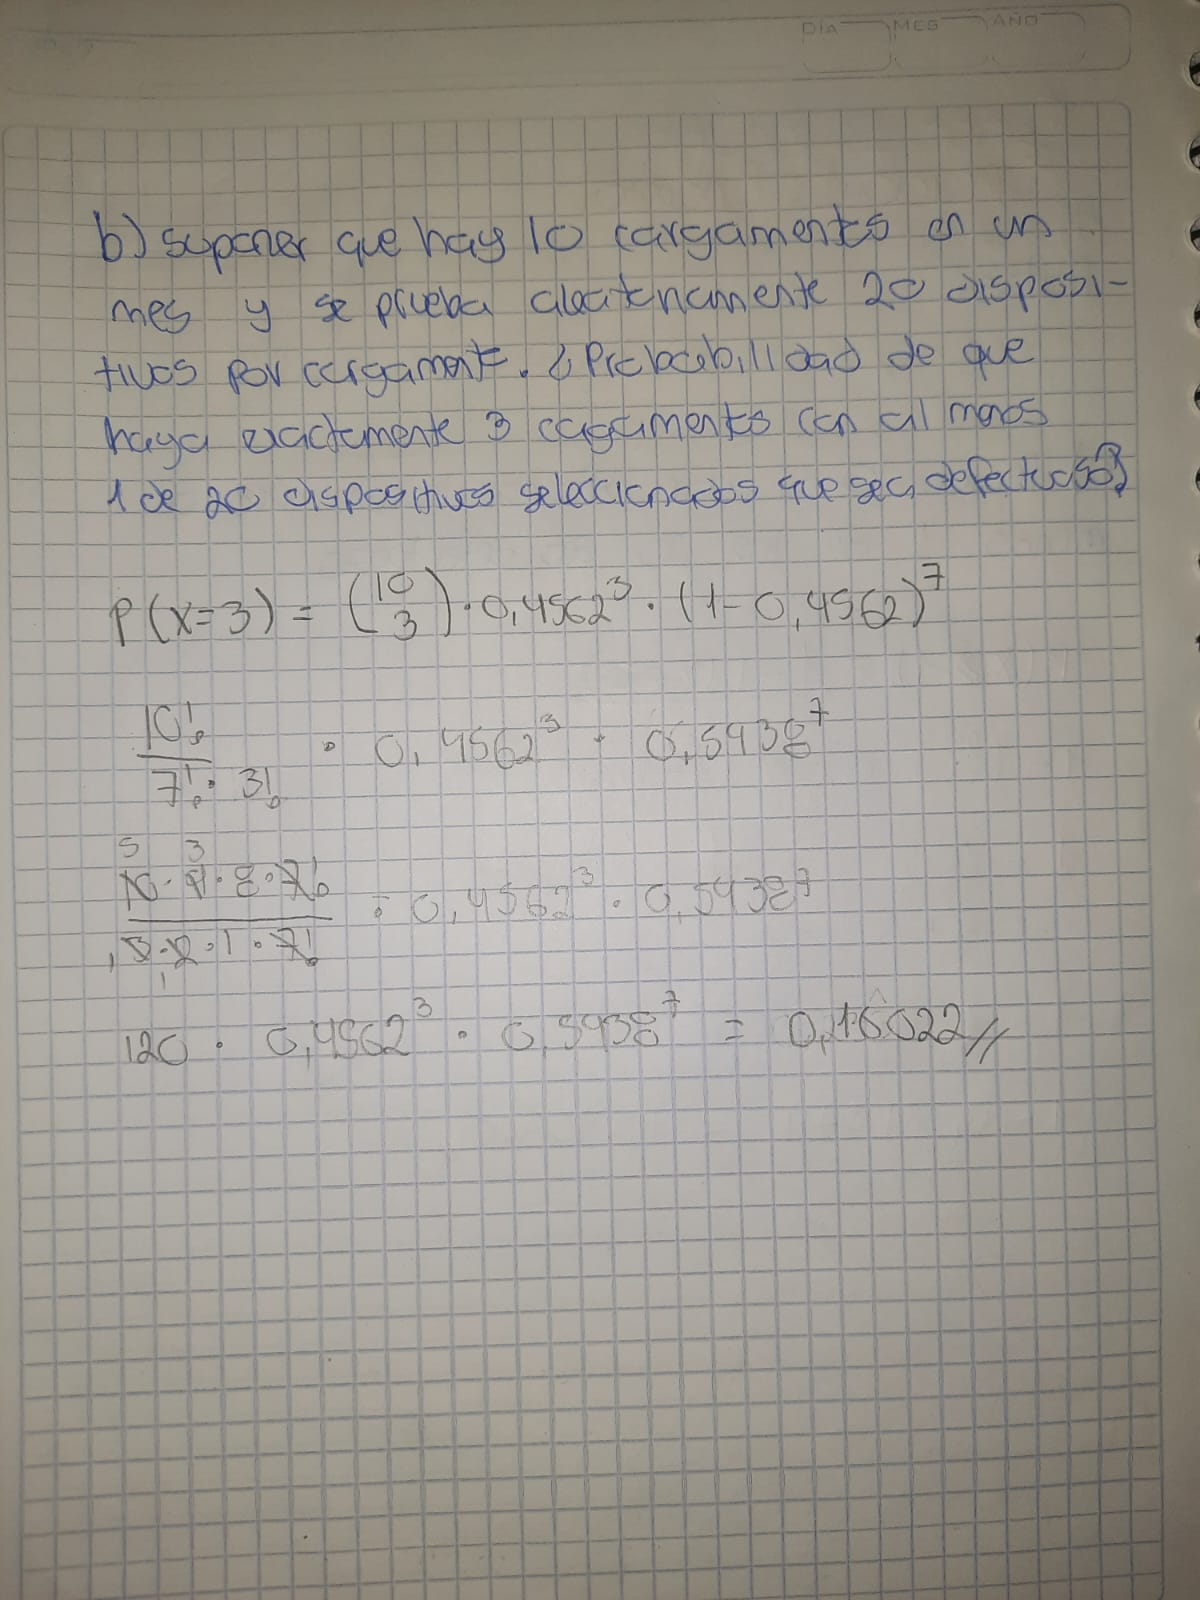

## a: Simulación
El inspector de la cadena elige 20 artículos al azar de un cargamento, cuál es la probabilidad de qué haya al menos un artículo defectuoso entre estos 20?

In [1]:

import random

def dispositivos_defectuosos(num_simulaciones, num_articulos, tasa_defectuosos):
    simulaciones_con_defectuosos = 0

    for _ in range(num_simulaciones):
        articulos = [random.random() < tasa_defectuosos for _ in range(num_articulos)]
        if any(articulos):
            simulaciones_con_defectuosos += 1
    probabilidad = simulaciones_con_defectuosos / num_simulaciones
    return probabilidad

num_simulaciones = 1000000  
num_articulos = 20         
tasa_defectuosos = 0.03    

probabilidad = dispositivos_defectuosos(num_simulaciones, num_articulos, tasa_defectuosos)

print(f"La probabilidad de al menos un artículo sea defectuoso entre {num_articulos} artículos es: {probabilidad:.4f}")

La probabilidad de al menos un artículo sea defectuoso entre 20 artículos es: 0.4567


## b: Simulación
Suponga que el detallista recibe 10 cargamentos en un mes y que el inspector prueba aleatoriamente 20 dispositivos por cargamento, cuál es la probabilidad de que haya exactamente tres cargamentos que contengan al menos un dispositivo defectuoso de entre los 20 seleccionados y probados?


In [7]:
import numpy as np

p = 0.4562
num_simulaciones = 100000

exito = 0
for i in range(num_simulaciones):
   items = np.random.rand(10) < p
   if np.sum(items*1) == 3:
       exito += 1
print("La probabilidad de que existan exactamente 3 cargamentos que contengan al menos 1 dispositivo defectuoso entre 20 seleccionados es: ",exito/num_simulaciones)


La probabilidad de que existan exactamente 3 cargamentos que contengan al menos 1 dispositivo defectuoso entre 20 seleccionados es:  0.16028


# Ejercicio 2
Lotes con 40 componentes donde cada uno contenga 3 o más componentes defectuosos se consideran inaceptables. El procedimiento para obtener muestras del lote consiste en seleccionar 5 componentes al azar y rechazar el lote si se encuentra un componente defectuoso. Cuál es la probabilidad de que en la muestra, se encuentre exactamente un componente defectuoso, si en todo el lote hay 3 defectuosos?

## Teórico
![WhatsApp Image 2023-12-10 at 11.44.50_40179d3f.jpg](<attachment:WhatsApp Image 2023-12-10 at 11.44.50_40179d3f.jpg>)
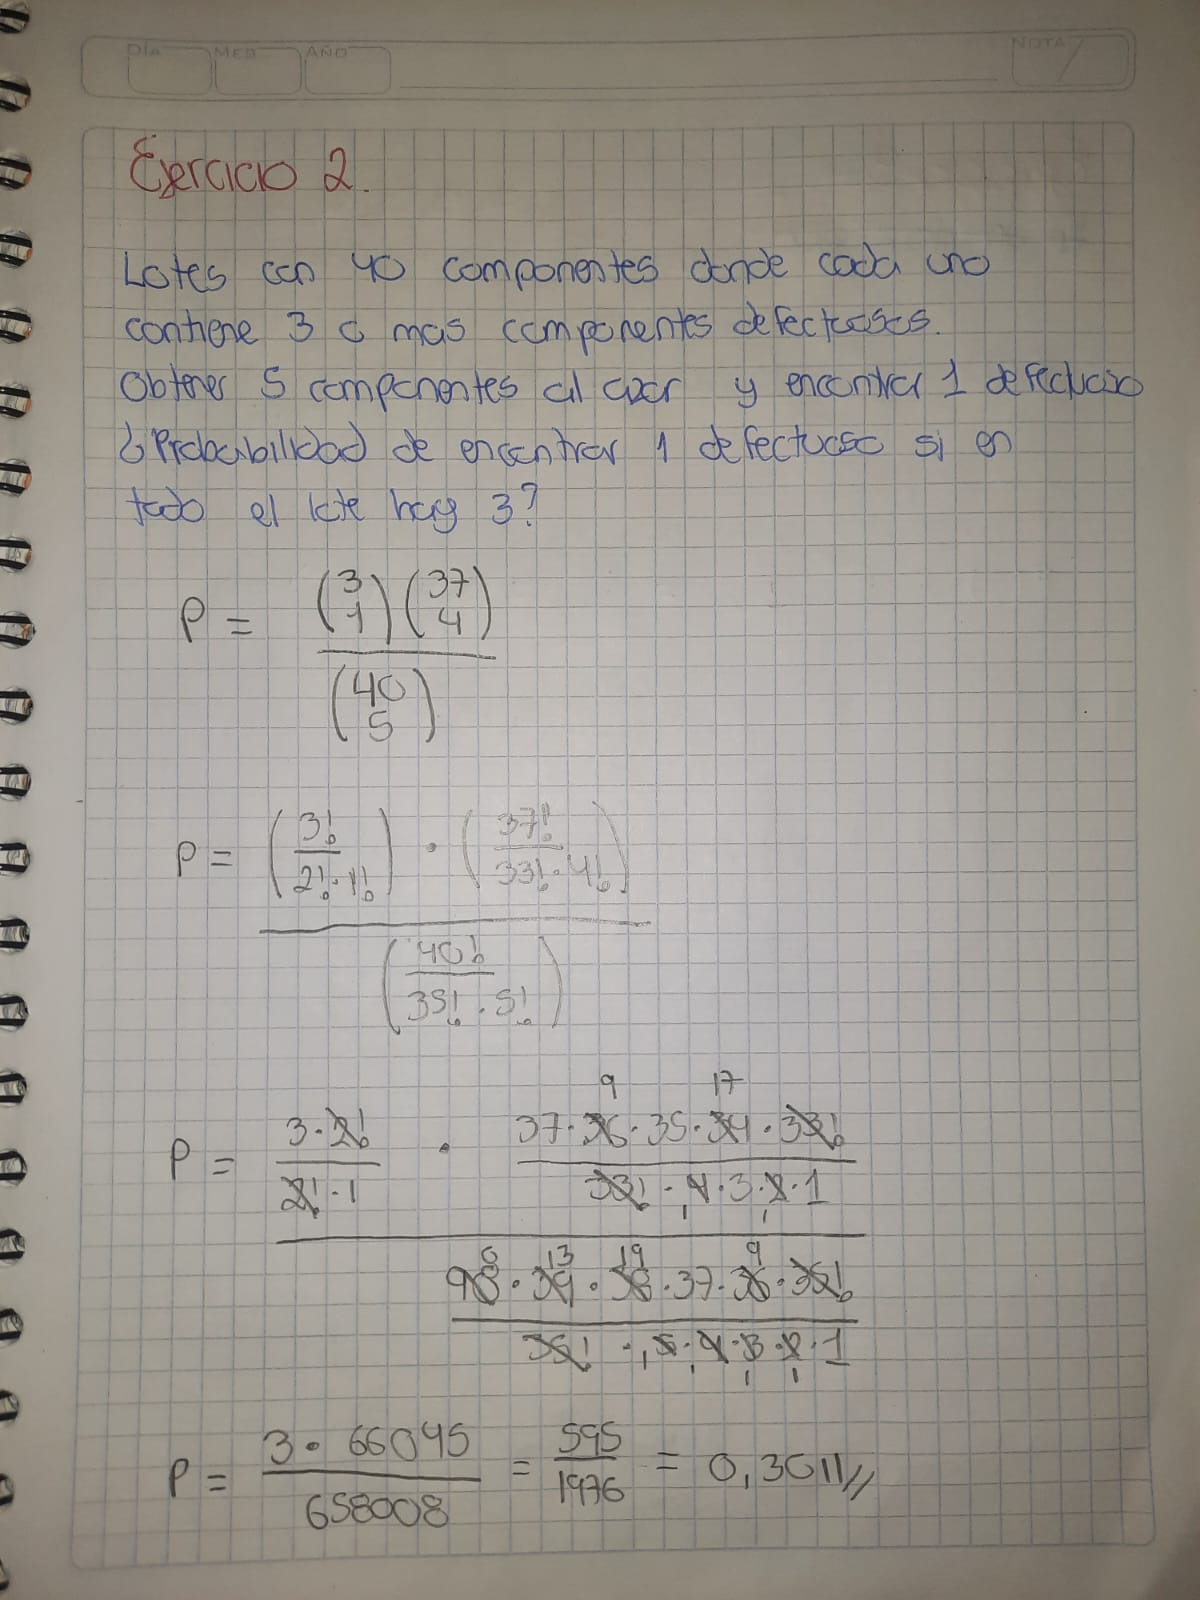

## Simulación

In [8]:
import random

def experimento():
    lote = [0] * 37 + [1] * 3  # 0 = componente no defectuoso, 1 = componente defectuoso
    muestra = random.sample(lote, 5)
    defectuosos_en_muestra = sum(muestra)
    return 1 if defectuosos_en_muestra == 1 else 0

num_experimentos = 100000
num_exitosos = sum(experimento() for _ in range(num_experimentos))
probabilidad = num_exitosos / num_experimentos

print("La probabilidad de que en la muestra 1 compnente sea defectuoso si en todo el lote hay 3 defectuosos es: ", probabilidad)


La probabilidad de que en la muestra 1 compnente sea defectuoso si en todo el lote hay 3 defectuosos es:  0.30142


# Ejercicio 3
En un río en particular, las inundaciones por desbordamiento ocurren en promedio una vez cada 100 años. Calcule la probabilidad de k = 0, 1, 2, 3, 4, 5, 6 inundaciones por desbordamiento en un intervalo de 100 años, suponiendo que el modelo de Poisson es apropiado.

## Teórico
![WhatsApp Image 2023-12-10 at 11.44.50_7306158e.jpg](<attachment:WhatsApp Image 2023-12-10 at 11.44.50_7306158e.jpg>)
![WhatsApp Image 2023-12-10 at 11.44.50_4fd9f12e.jpg](<attachment:WhatsApp Image 2023-12-10 at 11.44.50_4fd9f12e.jpg>)
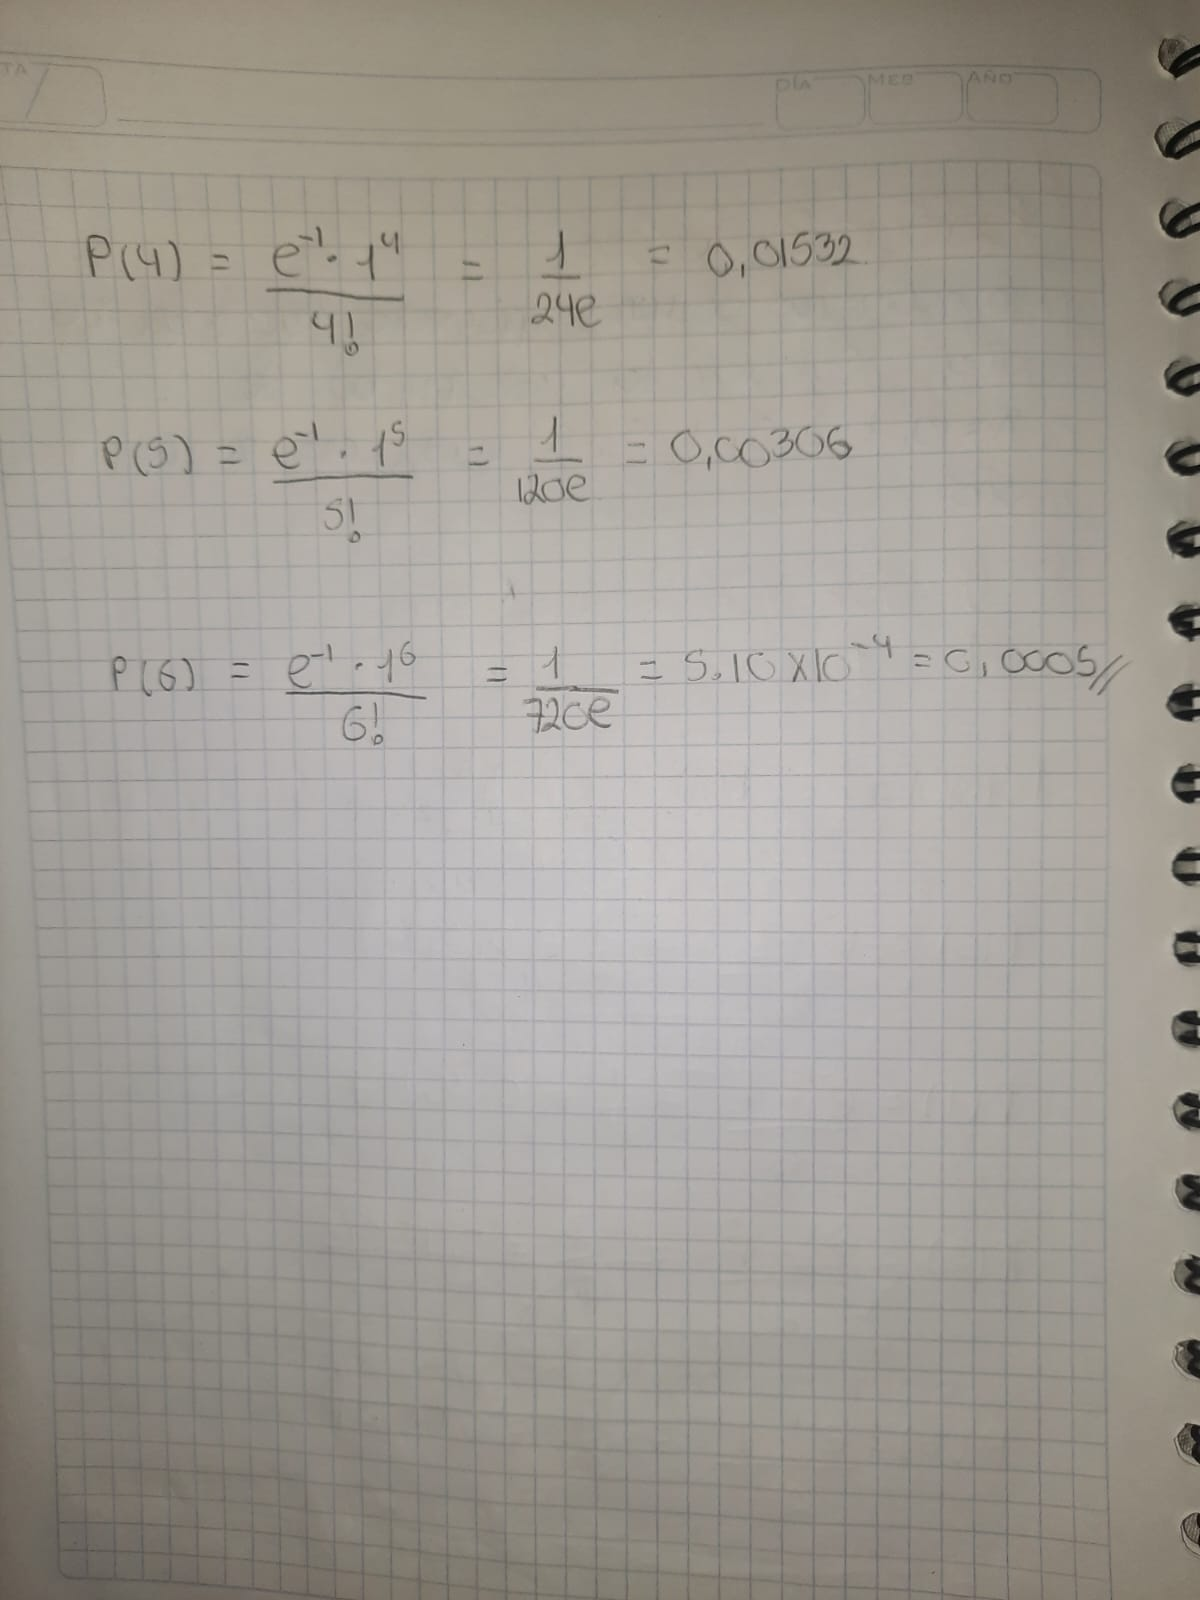
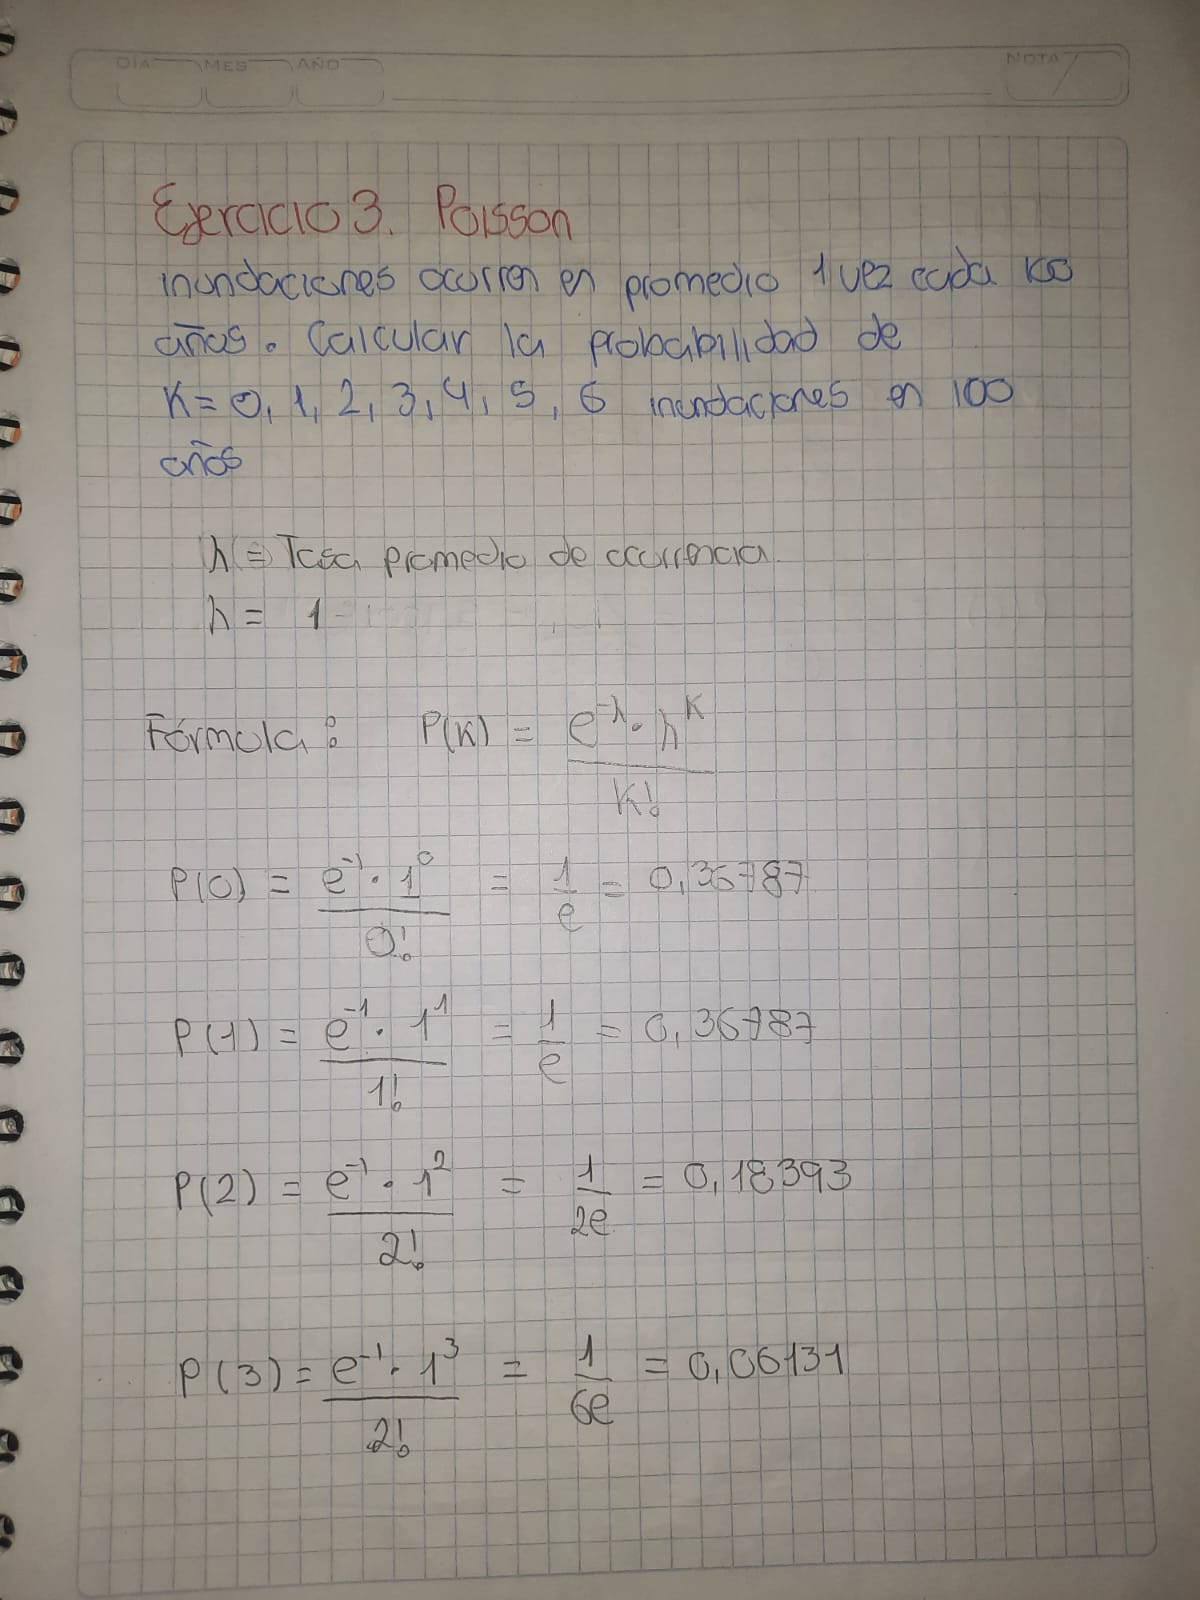

## Simulación

In [10]:
import math

def poisson_prob(lmbda, k):
    return (math.exp(-lmbda) * lmbda**k) / math.factorial(k)

def simulacion_poisson(lmbda, num_simulaciones):
    probabilidades = [poisson_prob(lmbda, k) for k in range(num_simulaciones)]
    return probabilidades

lmbda = 1 # Una inundación cada 100 años en promedio

num_simulaciones = 7

resultados = simulacion_poisson(lmbda, num_simulaciones)

for k, probabilidad in enumerate(resultados):
    print(f"Probabilidad de {k} inundaciones: {probabilidad:.5f}")


Probabilidad de 0 inundaciones: 0.36788
Probabilidad de 1 inundaciones: 0.36788
Probabilidad de 2 inundaciones: 0.18394
Probabilidad de 3 inundaciones: 0.06131
Probabilidad de 4 inundaciones: 0.01533
Probabilidad de 5 inundaciones: 0.00307
Probabilidad de 6 inundaciones: 0.00051


In [13]:
import numpy as np

promedio_inundaciones = 1 / 100  
repeticiones = 100000  

resultados = []

for _ in range(repeticiones):
    inundaciones_simuladas = np.random.poisson(lam=promedio_inundaciones * 100)
    resultados.append(inundaciones_simuladas)

probabilidades = []
for k in range(7):
    prob_k = sum(1 for result in resultados if result == k) / repeticiones
    probabilidades.append(prob_k)

for k, prob_k in enumerate(probabilidades):
    print(f"Probabilidad de {k} inundaciones: {prob_k:.4f}")


Probabilidad de 0 inundaciones: 0.3681
Probabilidad de 1 inundaciones: 0.3685
Probabilidad de 2 inundaciones: 0.1834
Probabilidad de 3 inundaciones: 0.0604
Probabilidad de 4 inundaciones: 0.0156
Probabilidad de 5 inundaciones: 0.0034
Probabilidad de 6 inundaciones: 0.0005


# Ejercicio 4
En “momentos ajetreados” un conmutador telefónico está muy cerca de su límite de capacidad, por lo que los usuarios tienen dificultad para hacer sus llamadas. Sería interesante saber cuantos intentos serían necesarios para conseguir un enlace telefónico. Suponga que la probabilidad de conseguir un enlace durante un momento ajetreado es p = 0.05. Nos interesa conocer la probabilidad de que se necesiten 5 intentos para enlazar con éxito una llamada.

## Teórico
![WhatsApp Image 2023-12-10 at 11.44.51_6f6de8b3.jpg](<attachment:WhatsApp Image 2023-12-10 at 11.44.51_6f6de8b3.jpg>)
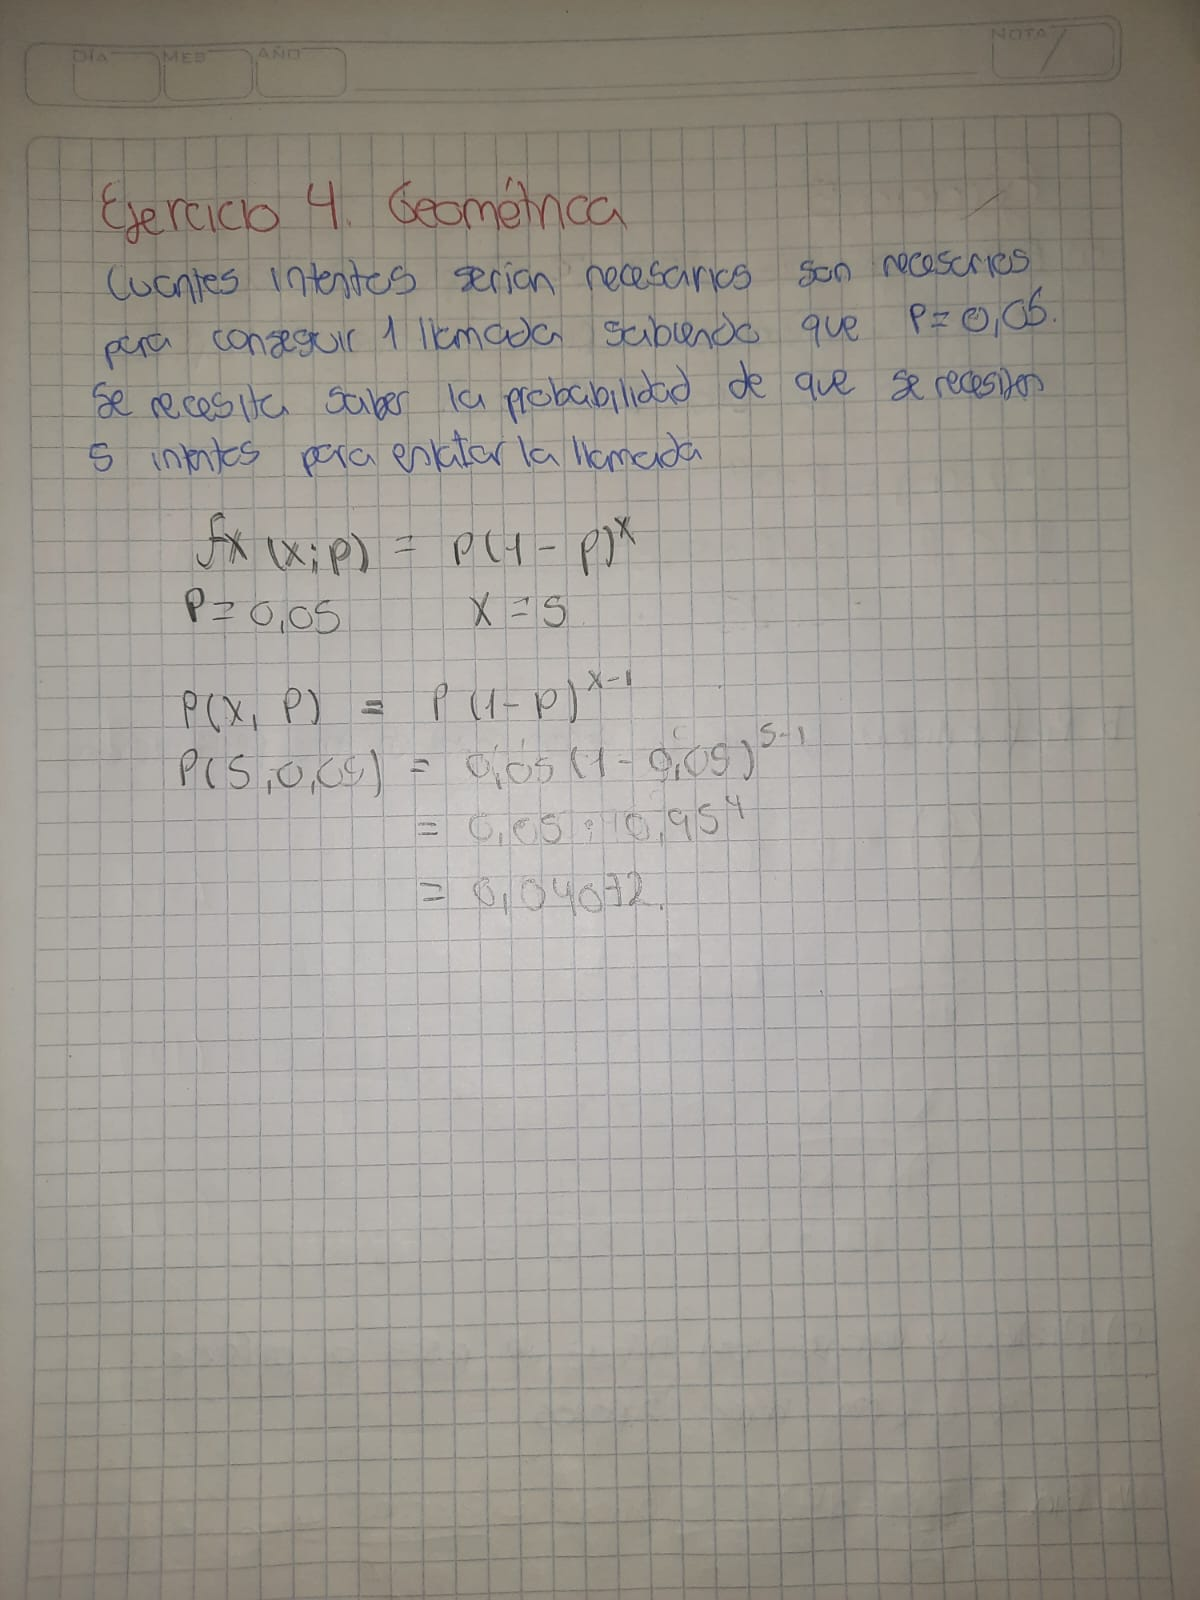

In [18]:
import random

def simulacion_enlace_exitoso(probabilidad_exito, intentos):
    for _ in range(intentos - 1):
        if random.random() <= probabilidad_exito:
            return 0
    
    return 1 if random.random() <= probabilidad_exito else 0

def simulacion_varios_intentos(probabilidad_exito, intentos_simulacion, intentos_para_exito):
    exitos = sum(simulacion_enlace_exitoso(probabilidad_exito, intentos_para_exito) for _ in range(intentos_simulacion))
    probabilidad = exitos / intentos_simulacion
    return probabilidad

probabilidad_exito = 0.05
intentos_simulacion = 100000 
intentos_para_exito = 5


probabilidad = simulacion_varios_intentos(probabilidad_exito, intentos_simulacion, intentos_para_exito)

print(f"Probabilidad de necesitar {intentos_para_exito} intentos para un enlace exitoso es: {probabilidad:.4f}")


Probabilidad de necesitar 5 intentos para un enlace exitoso es: 0.0407


# Ejercicio 5
Una compañía petrolera realiza un estudio geológico que indica que una perforación petrolera exploratoria tiene un 20% de posibilidades de encontrar petróleo.

## Teórico
![WhatsApp Image 2023-12-10 at 11.44.51_726a9ed0.jpg](<attachment:WhatsApp Image 2023-12-10 at 11.44.51_726a9ed0.jpg>)
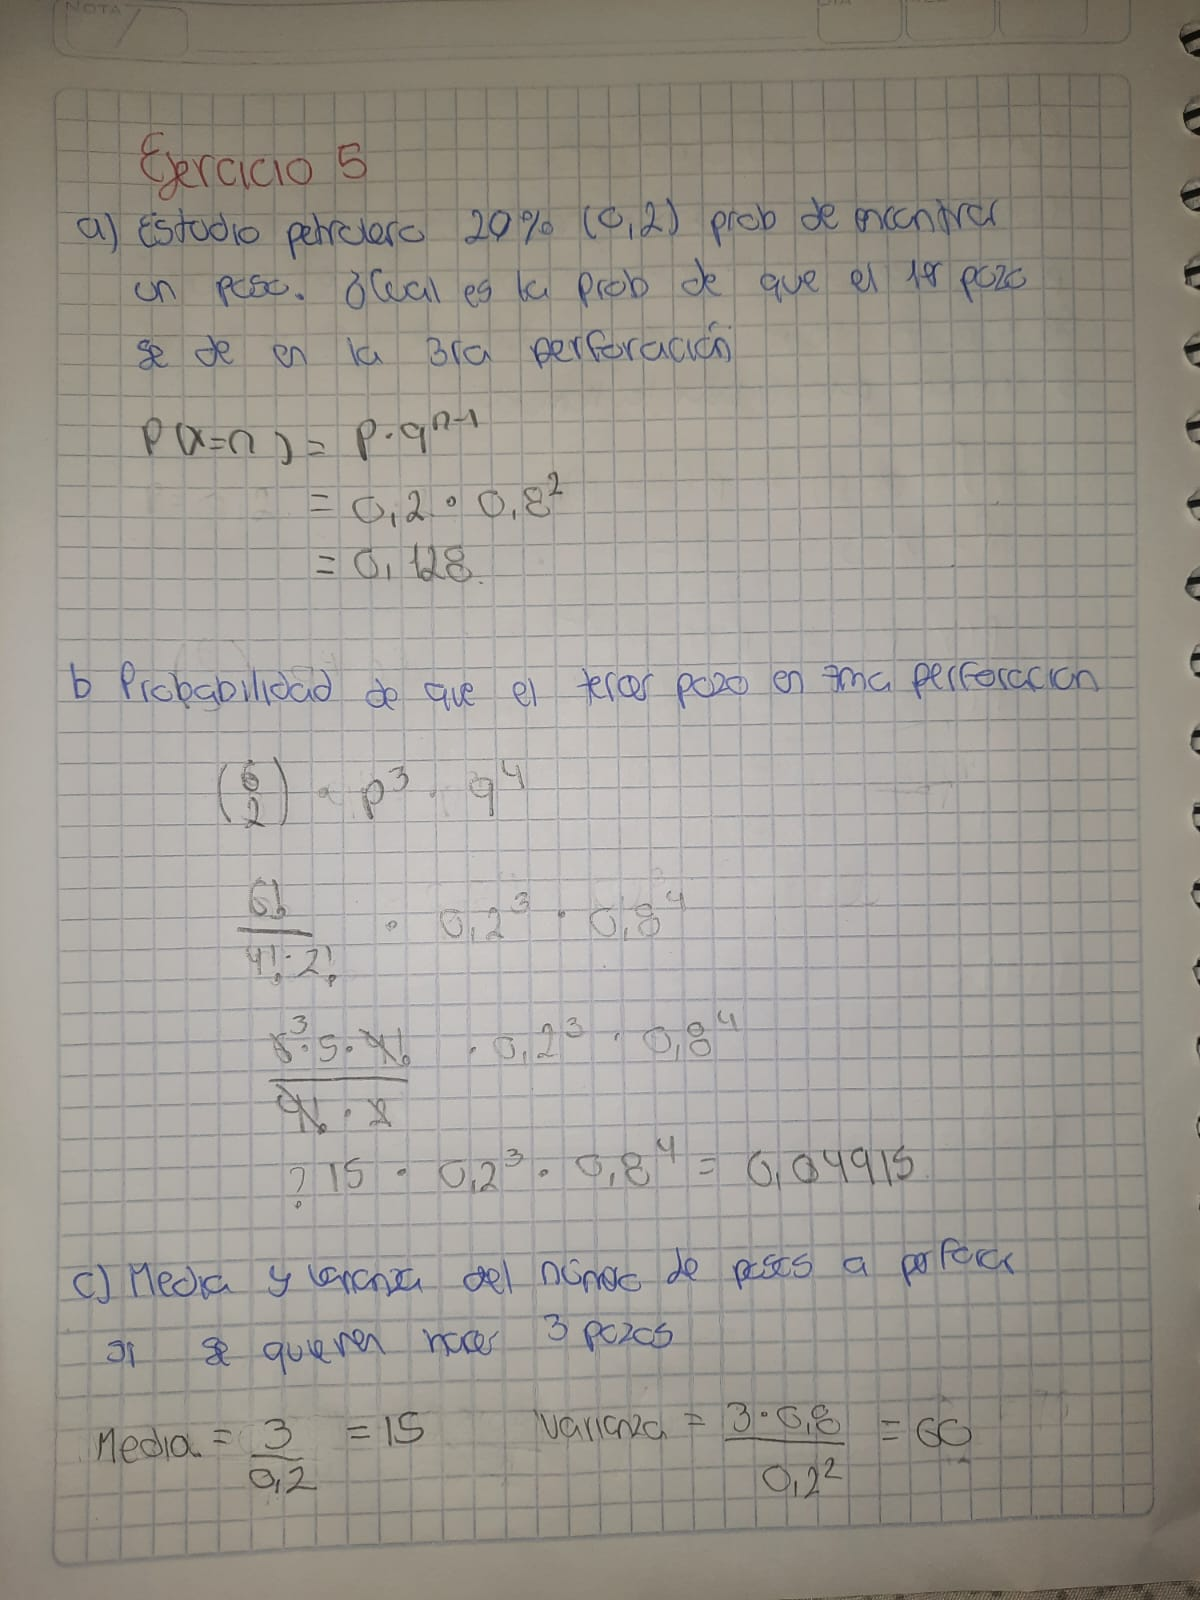

## a: Simulación
¿Cuál es la probabilidad de que el primer pozo se produzca en la tercer perforación?

In [19]:
import random

def simulacion_geometrica(p, objetivo, num_simulaciones):
    exitos = 0
    intentos_totales = 0

    for _ in range(num_simulaciones):
        intentos = 1
        while random.random() > p:
            intentos += 1
        intentos_totales += intentos
        if intentos == objetivo:
            exitos += 1

    probabilidad = exitos / num_simulaciones
    media = intentos_totales / num_simulaciones

    return probabilidad, media


p = 0.2  
objetivo = 3  
num_simulaciones = 100000  

probabilidad, media = simulacion_geometrica(p, objetivo, num_simulaciones)

print(f"La probabilidad de que el primer pozo se produzca en la tercera perforación es: : {probabilidad:.4f}")



La probabilidad de que el primer pozo se produzca en la tercera perforación es: : 0.1281


## b: Simulación
¿Cuál es la probabilidad de que el tercer pozo se produzca en la séptima perforación?

In [20]:
import random

num_simulations = 1000000
probabilidad_exito = 0.20
tercer_exito = 0

for _ in range(num_simulations):
    successes = 0
    trials = 0
    while successes < 3 and trials < 7:
        if random.random() < probabilidad_exito:
            successes += 1
        trials += 1
    if successes == 3 and trials == 7:
        tercer_exito += 1

print("La probabiliad de que el tercer pozo se produzca en la séptima perforación es: ", tercer_exito / num_simulations)

La probabiliad de que el tercer pozo se produzca en la séptima perforación es:  0.049029


## c: Simulación
¿Cuál es la media y la varianza del número de pozos que se deben perforar si la compañía petrolera quiere establecer tres pozos productores?

In [22]:
import numpy as np

probabilidad_encontrar_petroleo = 0.2
repeticiones = 10000
pozos_objetivo = 3

sumatoria_len = 0
sumatoria_len_cuadrado = 0

for _ in range(repeticiones):
    cant_pozos = 0
    pozos_perforados = 0

    while cant_pozos < pozos_objetivo:
        nuevo_pozo = np.random.choice([0, 1], p=[1 - probabilidad_encontrar_petroleo, probabilidad_encontrar_petroleo])
        pozos_perforados += 1
        cant_pozos += nuevo_pozo

    sumatoria_len += pozos_perforados
    sumatoria_len_cuadrado += pozos_perforados ** 2

media = sumatoria_len / repeticiones
varianza = (sumatoria_len_cuadrado / repeticiones) - (media ** 2)

print(f"Media del numero de posos para establecer 3 pozos productoers: {media:.4f}")
print(f"Varianza del numero de posos para establecer 3 pozos productoers: {varianza:.4f}")


Media del numero de posos para establecer 3 pozos productoers: 15.0019
Varianza del numero de posos para establecer 3 pozos productoers: 59.6367
